<img src="Tut 1.3.jpg" width="900" />

<img src="Tut 1.3 Hints.jpg" width="900" />

In [3]:
from numpy import log, array, exp, linspace, asarray
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Fto = 40/60 #mol/s
FAo = 0.33*Fto #mol/s
FBo = 0.67*Fto #mol/s
FCo = 0 #mol/s
Po  = 5*101.325 #kpa

In [5]:
#given:
T = 170 + 273.15 #Kelvin
R = 8.314/1000 #kpa.m3/mol.K
MMav = 0.030 #kg/kmol
epsilon = 0.4 #m3/m3 bed porosity(Vopen/Vtot)
Dreact = 0.085 #m reactor diameter
Aacross = (22/7)*(Dreact**2)/4 #m2 cross-sectional area
dcat = 0.003 #m
mu = 2e-5 #kg/m/s fluid viscosity 
rhobed = 1000 #kg/m^3 packed bed density
rhocat = rhobed/(1-epsilon)
rhoinit = (Po*MMav)/(R*T)
Kprime = 0.05/(60*101325) #molA/kg/s/pascalB

In [6]:
G = (MMav*Fto)/Aacross #kg/m2.s
K = (G/(rhoinit*dcat))*((1-epsilon)/(epsilon**3))*(150*mu*(1-epsilon)/dcat + 1.75*G)/(Aacross*rhocat*(1-epsilon))
print(G)
print(K)

3.5231204781377783
3180.718993486767


In [7]:
#a) assuming constant pressure Ptot = 5atm

In [8]:
#Xa = 1
#FA = FAo*(1-Xa)
#FB = FBo - 2*FAo*Xa
#FC = FCo + FAo*Xa
#Ftot = FA + FB + FC

In [9]:
def alg(F):
    FA, FB, FC = F    
    Ftot = F[0] + F[1] + F[2]
    Q = Ftot*R*T/Po
    CA = FA*Po/(Ftot*R*T)
    CB = FB*Po/(Ftot*R*T)
    CC = FC*Po/(Ftot*R*T)
    rAprime = -Kprime*FB*Po*1000/Ftot #remember to change P to pascals
    rBprime = 2*rAprime
    rCprime = -rAprime
    
    return[rAprime,rBprime,rCprime,Q,CA,CB,CC,Ftot]


    

In [10]:
def diffs(F,W):
    FA, FB, FC = F[0], F[1], F[2]
    var = alg([FA,FB,FC])
    dFAdW = var[0]
    dFBdW = var[1]
    dFCdW = var[2]
    return[dFAdW,dFBdW,dFCdW]


In [11]:
Fo = [FAo,FBo,FCo]
W = 44.308 #in Kg. Keep changing until XA=0.5
wspan = linspace(0,W,100)
F = odeint(diffs,Fo,wspan)
FA,FB,FC = F.T

XA = (FAo - FA[-1])/FAo

print(XA)
print('W= ',W,'kg catalyst')

0.500000375333
W=  44.308 kg catalyst


In [12]:
var = asarray([alg(F) for F in F]) # F is results from odeint
rA = var[:,0]
rB = var[:,1]
rC = var[:,2]
CA = var[:,4]
CB = var[:,5]
CC = var[:,6]

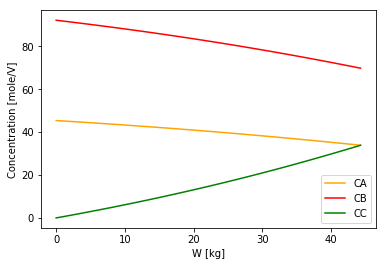

In [13]:
plt.figure(1)
plt.plot(wspan, CA, color='orange', label='CA')
plt.plot(wspan, CB, color='red',label='CB')
plt.plot(wspan, CC, color='green',label='CC')
plt.legend(loc='best')
plt.ylabel('Concentration [mole/V]') 
plt.xlabel('W [kg]') 
plt.show()

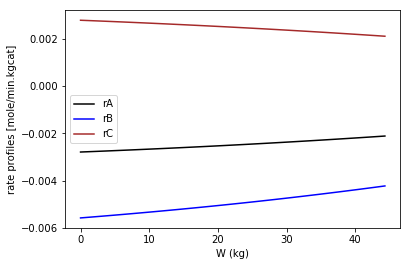

In [14]:
plt.figure(2)
plt.plot(wspan, rA, color='black', label='rA')
plt.plot(wspan, rB, color='blue',label='rB')
plt.plot(wspan, rC, color='brown',label='rC')
plt.legend(loc='best')
plt.ylabel('rate profiles [mole/min.kgcat]') 
plt.xlabel('W (kg)') 
plt.show()

In [15]:
#b) now allowing pressure drop using ergun equation

In [30]:
def diffs_pdrop(X,W):
    FA, FB, FC, P = X
    Ftot = FA + FB + FC
    rAprime = -Kprime*FB*P/Ftot
    rBprime = 2*rAprime
    rCprime = -rAprime
    dFAdW = rAprime
    dFBdW = rBprime
    dFCdW = rCprime
    dPdW  = -K*(Po*1000/P)*(Ftot/Fto)
    return[dFAdW,dFBdW,dFCdW,dPdW]

In [50]:
Vals = [FAo,FBo,FCo,Po*1000]
Wa = 52.8889#in Kg. Keep changing until XA=0.5
waspan = linspace(0,Wa,100)
sol = odeint(diffs_pdrop,Vals,waspan)
FA1,FB1,FC1,P1 = sol.T

XA1 = (FAo - FA1[-1])/FAo

print('conversion=', XA1*100,'%')
print('W= ',Wa,'kg catalyst')  
print('P@50%conv=',P1[-1]/101325,'atm')

conversion= 50.0008408109 %
W=  52.8889 kg catalyst
P@50%conv= 3.38176797696 atm


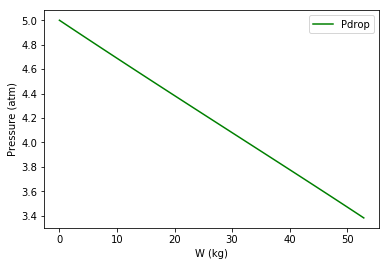

In [51]:
plt.figure(3)
plt.plot(waspan, P1/101325, color = 'green', label = 'Pdrop')
plt.xlabel('W (kg)')
plt.ylabel('Pressure (atm)')
plt.legend(loc='best')
#plt.grid()
plt.show()